## <span style="color:blue">This is a template or example workbook</span>

### <span style="color:#008891">Please read this if you want it to work</span>

__What this does:__ This note book imports the processed data from the litter surveys and provides an example of the functionality.

__When to use it:__ Whenever you want to start an analysis, this work book will save you some steps and provide a few convenience methods


#### Tasks:

1. Set the local path and provide variables for the subdirectories
2. Retrieve data from repo
3. Provide commonly used variables and formatting objects
4. Provide a method to save objects locally


questions or comments: analyst@hammerdirt.ch

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import utilities.utility_functions as ut

# documenting
from IPython.display import Markdown as md

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

### <span style="color:blue">micro analysis.</span>

Change as needed. Probably want to keep the local path reference though. Some common variables are established here:

1. the_lakes
2. poi
3. the_rivs

**poi** places of interest, project locations specified in the contract

**the_lakes** lakes of interest to the project

**the_rivs** the principal rivers.

In [2]:
# the local file structure. The resources are located in the corresponding directory.
# the purpose and date should be included in the filename when saving results to output
survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
ut.push_this_to_json(filename=F"{output}/codeListMicros.json", data=codesmicro)

putting: output/codeListMicros.json


In [4]:
codes=["G82", "G78"]
ut.push_this_to_json(filename=F"{output}/codeListMacros.json", data=codes)

putting: output/codeListMacros.json


In [5]:
# variables/arrays that are frequently used:
# project lakes
the_lakes = [
    "Bielersee",
    "Walensee",
    "Lac Léman",
    "Zurichsee",
    "Neuenburgersee",
    "Thunersee",
    "Lago Maggiore",
    "Brienzersee",
    "poi"
]

the_rivs = [
    'Aare',
    'Rhône',
    'Limmat',
    'Linth',
    'Ticino',
]
# project beaches
poi = [
    "neuenburgersee_cudrefin_mattera",
    "la-petite-plage",
    "evole-plage",
    "plage-de-cheyres",
    "mullermatte",
    "bielersee_vinelz_fankhausers",
    "baby-plage-geneva",
    "baye-de-montreux-g",
    "grand-clos",
    "preverenges",
    "quai-maria-belgia",
    "zurichsee_wollishofen_langendorfm",
    "zurichsee_kusnachterhorn_thirkell-whitej",
    "zuerichsee_richterswil_benkoem_2",     
    "rastplatz-stampf",
    "weissenau-neuhaus",
    "thunersee_spiez_meierd_1",
    "walensee_walenstadt_wysse",
    "gasi-strand",
    "vira-gambarogno",
    "sentiero-giro-del-golf-spiaggia",
    "maladaire"
   
]

In [6]:
# standard formats already in use for charts 
# you can just apply these as kwargs to different elements...
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':10, 'linespacing':1.5, 'fontsize':12}
title_k20 = {'loc':'left', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'dodgerblue'}
title_k17 = {'loc':'left', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'salmon'}
titler_k20 = {'loc':'right', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'dodgerblue'}
titler_k17 = {'loc':'right', 'pad':10, 'linespacing':1.5, 'fontsize':12, 'color':'salmon'}
xlab_k = {'labelpad':10, 'fontsize':12}
ylab_k = {'labelpad':14, 'fontsize':14}
titler_k = {'loc':'right', 'pad':10, 'linespacing':1.5, 'fontsize':12}

# use these to format date axis in charts
weeks = mdates.WeekdayLocator(byweekday=1, interval=4)
days = mdates.DayLocator(bymonthday=1, interval=1)
months = mdates.MonthLocator(bymonth=[3,6,9,12])
wks_fmt = mdates.DateFormatter('%d')
mths_fmt = mdates.DateFormatter('%b')

In [7]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv(F"{survey_data}/results_with_zeroes_aggregated_parent.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])

# non aggregated survey data
dfSurveys = pd.read_csv(F"{survey_data}/results_with_zeroes.csv")
dfSurveys['date'] = pd.to_datetime(dfSurveys['date'])

# beach data
dfBeaches = pd.read_csv(F"{location_data}/beaches_pop_bfs.csv")

# code definitions
dfCodes = pd.read_csv(F"{code_defs}/mlw_codes.csv")

### <span style="color:blue">Codes not id</span>

In [8]:
hmm = dfSurveys.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm.code.unique()

ahh=[code for code in dfCodes.code if code not in found]
dfSurveys.date.min()

Timestamp('2015-11-23 00:00:00')

In [9]:
print(ahh)

['G212', 'G206', 'G207', 'G209', 'G183', 'G184', 'G187', 'G189', 'G192', 'G196', 'G110', 'G120', 'G121', 'G15', 'G16', 'G18', 'G42', 'G44', 'G45', 'G46', 'G47', 'G51', 'G54', 'G57', 'G58', 'G69', 'G72', 'G77', 'G85', 'G86', 'G127', 'G130', 'G132', 'G998', 'G163', 'G164', 'G168', 'G169']


In [10]:
dfSurveys[dfSurveys.loc_date=="('reuss_ottenbach_schoenenbergerl', '2020-12-19')"]

,date,code,pcs_m,quantity,location,loc_date,water_name
62604,2020-12-19,G999,0.05,1,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62605,2020-12-19,G904,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62606,2020-12-19,G117,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62607,2020-12-19,G95,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62608,2020-12-19,G178,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
...,...,...,...,...,...,...,...
62821,2020-12-19,G180,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62822,2020-12-19,G193,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62823,2020-12-19,G56,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss
62824,2020-12-19,G88,0.00,0,reuss_ottenbach_schoenenbergerl,"('reuss_ottenbach_schoenenbergerl', '2020-12-19')",Reuss


In [11]:
construction=['G9',
              'G17',
              'G22','G66', 'G68','G69','G72','G73', 'G74','G81','G82', 'G83','G87','G89','G93','G160','G162','G169','G174','G186','G188','G189','G190','G194','G908','G921','G931']
# saving to .json
ut.push_this_to_json(filename=F"{output}/construction.json", data=ahh)

putting: output/construction.json


In [12]:
ahh=[code for code in dfCodes.code if code not in found]
[code for code in construction if code in ahh]

['G69', 'G72', 'G169', 'G189']

In [20]:
cdate


,date,loc_date,code,pcs_m,quantity,location,water_name
0,2020-10-22,"('aabach', '2020-10-22')",G1,0.0,0,aabach,Zurichsee
1,2020-10-22,"('aabach', '2020-10-22')",G10,0.0,0,aabach,Zurichsee
2,2020-10-22,"('aabach', '2020-10-22')",G100,0.0,0,aabach,Zurichsee
3,2020-10-22,"('aabach', '2020-10-22')",G101,0.0,0,aabach,Zurichsee
4,2020-10-22,"('aabach', '2020-10-22')",G102,0.0,0,aabach,Zurichsee
...,...,...,...,...,...,...,...
44387,2021-01-10,"('zurichsee_wollishofen_langendorfm', '2021-01...",G96,0.0,0,zurichsee_wollishofen_langendorfm,Zurichsee
44388,2021-01-10,"('zurichsee_wollishofen_langendorfm', '2021-01...",G97,0.0,0,zurichsee_wollishofen_langendorfm,Zurichsee
44389,2021-01-10,"('zurichsee_wollishofen_langendorfm', '2021-01...",G98,0.0,0,zurichsee_wollishofen_langendorfm,Zurichsee
44390,2021-01-10,"('zurichsee_wollishofen_langendorfm', '2021-01...",G99,0.0,0,zurichsee_wollishofen_langendorfm,Zurichsee


In [13]:
# saving to .json
ut.push_this_to_json(filename=F"{output}/codeNotfound.json", data=ahh)

putting: output/codeNotfound.json


In [14]:
construction=['G9',
              'G17',
              'G22','G66', 'G68','G69','G72','G73', 'G74','G81','G82', 'G83','G87','G89','G93','G160','G162','G169','G174','G186','G188','G189','G190','G194','G908','G921','G931']

### <span style="color:#008891">Make a place for your output and save work there</span>

Make a folder in the output directory for any thing you want to save. That way its on the same directory as all the other workbooks.

There is a convenience method for making a directory

In [15]:
project_dir = ut.make_project_folder(output, 'micro_directory')

That project exists


### <span style="color:#008891">Save some product to the new directory</span>

In [40]:
cone = hmm.loc[hmm.code.isin(construction)]
cone.set_index('code', inplace=True, drop=True)
cone


,quantity
code,
G160,12
G162,1
G17,5
G174,7
G186,110
G188,14
G190,2
G194,130
G22,573


In [16]:
# if you plan on using date time then you need to do that yourself:
dfAgg.set_index('date', inplace=True)

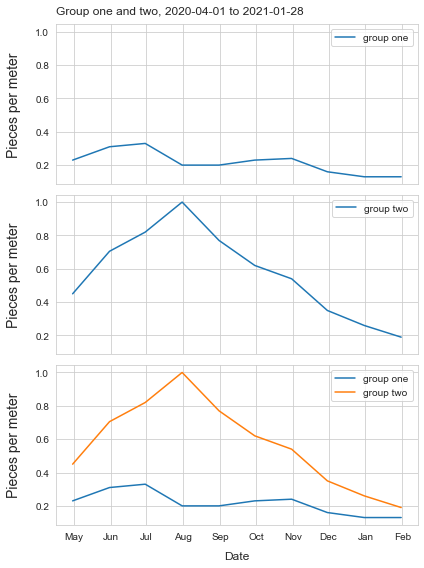

In [41]:
# set some parameters:
start_date = '2020-04-01'
end_date = dt.datetime.today().strftime('%Y-%m-%d')

# draw two curves of the monthly average of two code groups
cdate = dfAgg.loc[start_date:end_date].copy()

# get only the lake values
cdate = cdate[cdate.water_name.isin(the_lakes)]
cdate.reset_index(inplace=True)

# break this up into code groups
cone = cdate.loc[cdate.code.isin(construction)].groupby(['loc_date', 'date'], as_index=False).pcs_m.sum()
cone.set_index('date', inplace=True)

ctwo = cdate.loc[cdate.code.isin(['G74', 'G82', 'G81', 'G67', 'G89', 'G79', 'G78'])].groupby(['loc_date', 'date'], as_index=False).pcs_m.sum()
ctwo.set_index('date', inplace=True)

# pull the monthly figures
coneM = cone.resample('M').pcs_m.median()
ctwoM = ctwo.resample('M').pcs_m.median()

# save the chart:
sns.set_style('whitegrid')
fig, axs = plt.subplots(3,1, figsize=(6,8),sharex = True, sharey=True)

axone = sns.lineplot(data=coneM, x=coneM.index, y=coneM, label='group one', ax=axs[0])
axtwo = sns.lineplot(data=ctwoM, x=ctwoM.index, y=ctwoM, label='group two', ax=axs[1])
axthree = sns.lineplot(data=coneM, x=coneM.index, y=coneM, label='group one', ax=axs[2])
sns.lineplot(data=ctwoM, x=ctwoM.index, y=ctwoM, label='group two',  ax=axs[2])
axs[2].xaxis.set_major_formatter(mths_fmt)
axs[2].set_xlabel('Date', **xlab_k)
axs[0].set_ylabel('Pieces per meter', **ylab_k)
axs[1].set_ylabel('Pieces per meter', **ylab_k)
axs[2].set_ylabel('Pieces per meter', **ylab_k)

axs[0].set_title(F"Group one and two, {start_date} to {end_date}", **title_k)
plt.tight_layout()
plt.savefig(F"{project_dir}/atestchart.svg")
plt.show()
plt.close()


In [18]:
# save some data
cone.to_csv(F"{atestproject}/group_one_agg.csv", index = False)

NameError: name 'atestproject' is not defined

#### Hopefully that just worked for you

if not contact analyst@hammerdirt.ch